## Assignment:

Deadline : 09.03.2016 Wed  18:59

* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of vehicles in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.

$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


* Fit an AR model to each data sequence 
$$
y_i = w_1 y_{i-1} + \epsilon_i
$$

Which model would you prefer? Polynomial or AR?

For each model, plot the data and your model fit $f = A w^*$

### Bonus: 
Use cross validation for finding the best polynomial order and describe you approach.



Name : Mustafa GENÇ

[[ 10.509258   9.857915]]
[[ 11.16241435]]


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


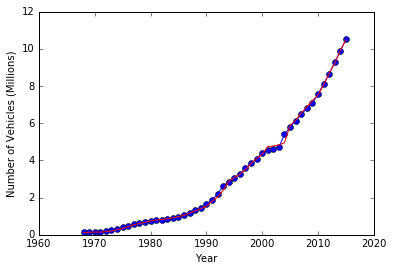

[[ 0.446822  0.427264]]
[[ 0.46006375]]


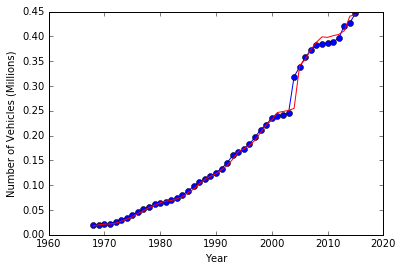

[[ 0.216566  0.2112  ]]
[[ 0.21687273]]


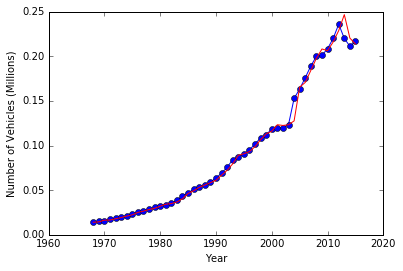

In [1]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

K = 2
BaseYear = 1966
PredictionBaseYear = 2016
data_vehicle = pd.read_csv(u'data/vehicle.csv', sep=';')

# years to predict
x_predict = np.vstack([2016, 2017, 2018, 2019, 2020]) - BaseYear

def predict_polynomial(vehicles, years, vehicle_type):
    A = np.hstack((np.power(years, i) for i in range(K + 1)))
    y_existing = np.matrix(vehicles).T/1000000.0
    w_star = (A.T * A).I * A.T * y_existing
    
    A_predict = np.hstack((np.power(x_predict, i) for i in range(K + 1)))
    y_predict = A_predict * w_star
    
    x_all = np.vstack([years, x_predict])
    y_all = np.vstack([A * w_star, y_predict])
    
    print "\n"
    print "\n"
    print "------" + vehicle_type + "------"
    plt.plot(years + BaseYear, y_existing, 'o-')
    plt.xlabel("Year")
    plt.ylabel("Number of Vehicles (Millions)")
    
    plt.plot(x_all + BaseYear, y_all, "r-")
    plt.show()

    for i in range(5): 
        print vehicle_type + " Prediction %d : %f" % (i + PredictionBaseYear, y_predict[i]) 
    return

def predict_ar(vehicles, years, vehicle_type):
    y_down = np.matrix(vehicles[K - 1:-(K - 1)]).T/1000000.0
    y_down_2 = np.matrix(vehicles[:-K]).T/1000000.0
    y_up = np.matrix(vehicles[K:]).T/1000000.0

    A = np.hstack([y_down, y_down_2])
    AX = np.hstack((np.vstack(y_up[-(i + 1)]) for i in range(K)))
    print(AX)
    
    w_star = (A.T * A).I * A.T * y_up
    
    f = A * w_star
    A_predict = np.hstack((f[-(i + 1)] for i in range(K)))
    
    print(A_predict * w_star)
    
    plt.plot(years[K:] + BaseYear, y_up, 'o-')
    plt.xlabel("Year")
    plt.ylabel("Number of Vehicles (Millions)")
    plt.plot(years[K:] + BaseYear, f, "r-")
    plt.show()
    
    return
# create x axis matrix
x = np.matrix(data_vehicle.Year).T - BaseYear
A = np.hstack((np.power(x, i) for i in range(K + 1)))
predict_ar(data_vehicle.Car, x, "CAR")
predict_ar(data_vehicle.Minibus, x, "MINIBUS")
predict_ar(data_vehicle.Bus, x, "BUS")

# plot existing data and predict upcoming years
#predict_polynomial(data_vehicle.Car, x, "CAR")
#predict_polynomial(data_vehicle.Minibus, x, "MINIBUS")
#predict_polynomial(data_vehicle.Bus, x, "BUS")
#predict_polynomial(data_vehicle.SmallTruck, x, "SMALL_TRUCK")
#predict_polynomial(data_vehicle.Truck, x, "TRUCK")
#predict_polynomial(data_vehicle.Motorcycle, x, "MOTORCYCLE")
#predict_polynomial(data_vehicle.SpecialVehicles, x, "SPECIAL_VEHICLES")
# no prediction actually, no data after 2004 for machinery
#predict_polynomial(data_vehicle.Machinery, x, "MACHINERY")
# use data after 13th index since tractor info exists after 1979
#predict_polynomial(data_vehicle.Tractor[13:], x[13:], "TRACTOR")